In [2]:
#ML project 1 :house price prediction

**Load the dataset from github**


In [86]:
import pandas as pd
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

#observe the first five rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**visualization of data**

In [87]:
import matplotlib.pyplot as plt

In [88]:
print(df[['rm', 'medv']].describe())

               rm        medv
count  506.000000  506.000000
mean     6.284634   22.532806
std      0.702617    9.197104
min      3.561000    5.000000
25%      5.885500   17.025000
50%      6.208500   21.200000
75%      6.623500   25.000000
max      8.780000   50.000000


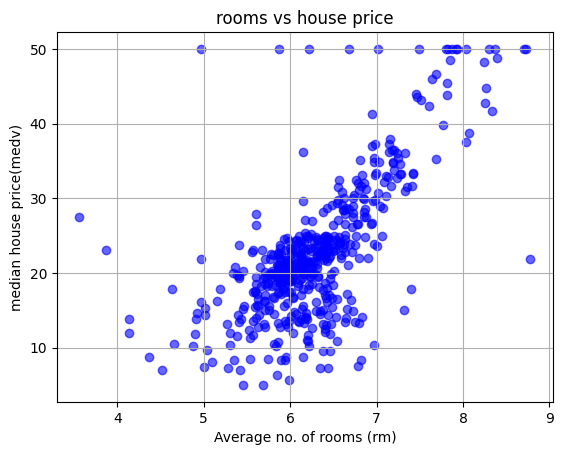

In [89]:
plt.scatter(df['rm'],df['medv'], color ='blue', alpha = 0.6)
plt.xlabel("Average no. of rooms (rm)")
plt.ylabel("median house price(medv)")
plt.title("rooms vs house price")
plt.grid(True)
plt.show()

*linear regression would be a great fit*

In [97]:
import numpy as np

x = df['rm'].values.reshape(-1,1)
y = df['medv'].values.reshape(-1,1)

#normalize features for better training
x_mean, x_std = x.mean(),x.std()
x = (x - x_mean)/x_std

print("feature shape:",x.shape)
print("target shape:",y.shape)

feature shape: (506, 1)
target shape: (506, 1)


**model**

In [98]:
# for reproducibility
np.random.seed(42)

#initialize weight and bias
w = np.random.randn(1)
b = np.random.randn(1)

print("initial w :",w)
print("initial b:", b)

initial w : [0.49671415]
initial b: [-0.1382643]


In [99]:
#define prdiction function
def predict(x,w,b):
    return np.dot(x,w) + b
    

In [100]:
#define cost function
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [104]:
# gradient descent
learn_rate = 0.01
epochs = 1000

loss_history = []
for epoch in range(epochs):
    y_pred = predict(x,w,b)

    #compute loss
    loss = compute_loss(y, y_pred)
    loss_history.append(loss)

    #compute gradient
    dw = -2*np.mean((y- y_pred)*x)
    db = -2*np.mean(y-y_pred)

    #update parameters
    w = w - learn_rate * dw
    b = b- learn_rate*db

    if epoch %100 ==0:
        print(f"Epoch{epoch}:loss = {loss: .4f}, w = {w[0]:.4f}, b= {b[0]:.4f}")

Epoch0:loss =  81524394813336092672.0000, w = -127.1550, b= -8848504301.8560
Epoch100:loss =  1433846703040731648.0000, w = -114.3771, b= -1173484691.3004
Epoch200:loss =  25218419253880536.0000, w = -101.5991, b= -155626999.0650
Epoch300:loss =  443540211325764.1875, w = -88.8212, b= -20639163.9567
Epoch400:loss =  7800961560033.8047, w = -76.0432, b= -2737137.2135
Epoch500:loss =  137202899390.7275, w = -63.2653, b= -362978.3772
Epoch600:loss =  2413119842.7759, w = -50.4873, b= -48118.4867
Epoch700:loss =  42443292.4734, w = -37.7094, b= -6361.9078
Epoch800:loss =  747176.0797, w = -24.9314, b= -824.1689
Epoch900:loss =  13364.0120, w = -12.1535, b= -89.7564


**Plot Training loss vs epochs**

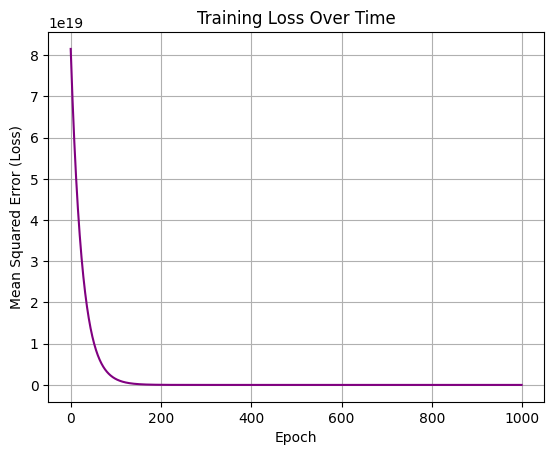

In [105]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(loss_history, color='purple')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Training Loss Over Time")
plt.grid(True)
plt.show()


**Plot regression line**

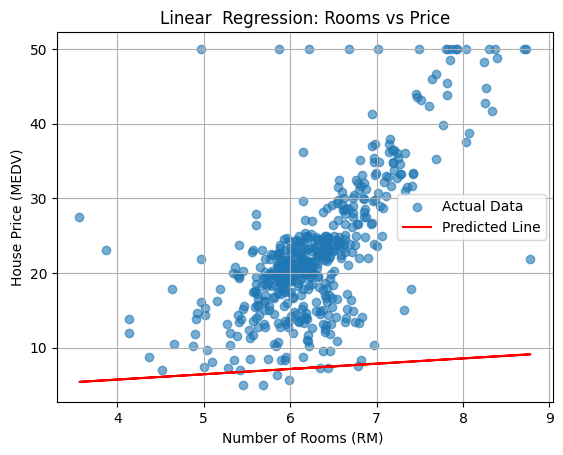

In [106]:
# Predict using final learned W and b
y_pred_final = predict(x, w, b)

# Inverse transform X for plotting (since we normalized it before)
#x_plot = x*x_std +x_mean

plt.scatter(x_plot, y,label="Actual Data", alpha=0.6)
plt.plot(x_plot, y_pred_final,color='red',label="Predicted Line")
plt.xlabel("Number of Rooms (RM) ")
plt.ylabel("House Price (MEDV)")
plt.title("Linear  Regression: Rooms vs Price")
plt.legend()
plt.grid(True)
plt.show()
